In [295]:
#dataset link:  https://www.kaggle.com/datasets/ninzaami/loan-predication

In [296]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer  #for missing values

In [297]:
df=pd.read_csv("train_loan.csv")

In [298]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [299]:
df["Loan_Status"].value_counts()  #422 Y 192N var uniform dagılmıs

Y    422
N    192
Name: Loan_Status, dtype: int64

In [300]:
df.isnull().sum()  # missing values detected

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [301]:
df=df.dropna(axis=0)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [302]:
df=df.drop(["Loan_ID"], axis=1)  #drop the id column to prevent supervizing
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Education', ylabel='count'>

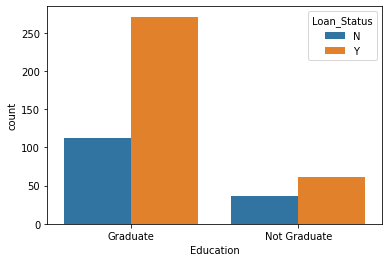

In [303]:
sns.countplot(x="Education",hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

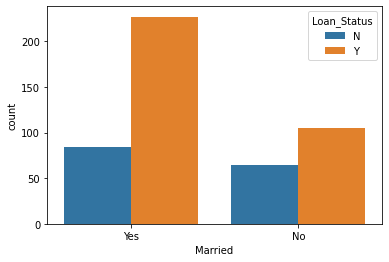

In [304]:
sns.countplot(x="Married",hue="Loan_Status",data=df)

In [305]:
gender=df["Gender"].values
married=df["Married"].values
Education=df["Education"].values
Self_Employed=df["Self_Employed"].values
Property_Area=df["Property_Area"].values
df=df.drop(["Gender","Married","Education","Self_Employed","Property_Area"],axis=1)
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,1,4583,1508.0,128.0,360.0,1.0,N
2,0,3000,0.0,66.0,360.0,1.0,Y
3,0,2583,2358.0,120.0,360.0,1.0,Y
4,0,6000,0.0,141.0,360.0,1.0,Y
5,2,5417,4196.0,267.0,360.0,1.0,Y
...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,Y
610,3+,4106,0.0,40.0,180.0,1.0,Y
611,1,8072,240.0,253.0,360.0,1.0,Y
612,2,7583,0.0,187.0,360.0,1.0,Y


In [306]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

gender = le.fit_transform(gender)

gender=pd.DataFrame(gender,columns=["Gender"])
gender

,Gender
0,1
1,1
2,1
3,1
4,1
...,...
475,0
476,1
477,1
478,1


In [307]:
le = preprocessing.LabelEncoder()

married = le.fit_transform(married)

married=pd.DataFrame(married,columns=["Married"])
married

,Married
0,1
1,1
2,1
3,0
4,1
...,...
475,0
476,1
477,1
478,1


In [308]:
le = preprocessing.LabelEncoder()

Education = le.fit_transform(Education)

Education=pd.DataFrame(Education,columns=["Education"])
Education

,Education
0,0
1,0
2,1
3,0
4,0
...,...
475,0
476,0
477,0
478,0


In [309]:
le = preprocessing.LabelEncoder()

Self_Employed = le.fit_transform(Self_Employed)

Self_Employed=pd.DataFrame(Self_Employed,columns=["Self_Employed"])
Self_Employed

,Self_Employed
0,0
1,1
2,0
3,0
4,1
...,...
475,0
476,0
477,0
478,0


In [310]:
le = preprocessing.LabelEncoder()

Property_Area = le.fit_transform(Property_Area)

Property_Area=pd.DataFrame(Property_Area,columns=["Property_Area"])
Property_Area

,Property_Area
0,0
1,2
2,2
3,2
4,2
...,...
475,0
476,0
477,2
478,2


In [311]:

ohe = preprocessing.OneHotEncoder()
Property_Area = ohe.fit_transform(Property_Area).toarray()
print(Property_Area)


[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [312]:
Property_Area=pd.DataFrame(Property_Area, columns=["Urban","Rural","Semiurban"])
Property_Area

,Urban,Rural,Semiurban
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
475,1.0,0.0,0.0
476,1.0,0.0,0.0
477,0.0,0.0,1.0
478,0.0,0.0,1.0


In [313]:
df2=pd.concat([gender,married,Education,Self_Employed,Property_Area,],axis=1)
df2

,Gender,Married,Education,Self_Employed,Urban,Rural,Semiurban
0,1,1,0,0,1.0,0.0,0.0
1,1,1,0,1,0.0,0.0,1.0
2,1,1,1,0,0.0,0.0,1.0
3,1,0,0,0,0.0,0.0,1.0
4,1,1,0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...
475,0,0,0,0,1.0,0.0,0.0
476,1,1,0,0,1.0,0.0,0.0
477,1,1,0,0,0.0,0.0,1.0
478,1,1,0,0,0.0,0.0,1.0


In [314]:
df3=df.iloc[:,:]
df3=np.array(df3)

df3=pd.DataFrame(df3)
df3

,0,1,2,3,4,5,6
0,1,4583,1508.0,128.0,360.0,1.0,N
1,0,3000,0.0,66.0,360.0,1.0,Y
2,0,2583,2358.0,120.0,360.0,1.0,Y
3,0,6000,0.0,141.0,360.0,1.0,Y
4,2,5417,4196.0,267.0,360.0,1.0,Y
...,...,...,...,...,...,...,...
475,0,2900,0.0,71.0,360.0,1.0,Y
476,3+,4106,0.0,40.0,180.0,1.0,Y
477,1,8072,240.0,253.0,360.0,1.0,Y
478,2,7583,0.0,187.0,360.0,1.0,Y


In [315]:
depend=df3[0]
type(depend)

depend=depend.replace("3+",value=4)

df33=df3.drop([0],axis=1)
df33

df333=pd.concat([depend,df33],axis=1)
df333

,0,1,2,3,4,5,6
0,1,4583,1508.0,128.0,360.0,1.0,N
1,0,3000,0.0,66.0,360.0,1.0,Y
2,0,2583,2358.0,120.0,360.0,1.0,Y
3,0,6000,0.0,141.0,360.0,1.0,Y
4,2,5417,4196.0,267.0,360.0,1.0,Y
...,...,...,...,...,...,...,...
475,0,2900,0.0,71.0,360.0,1.0,Y
476,4,4106,0.0,40.0,180.0,1.0,Y
477,1,8072,240.0,253.0,360.0,1.0,Y
478,2,7583,0.0,187.0,360.0,1.0,Y


In [316]:
df_sonuc=pd.concat([df2, df333],axis=1)
df_sonuc



,Gender,Married,Education,Self_Employed,Urban,Rural,Semiurban,0,1,2,3,4,5,6
0,1,1,0,0,1.0,0.0,0.0,1,4583,1508.0,128.0,360.0,1.0,N
1,1,1,0,1,0.0,0.0,1.0,0,3000,0.0,66.0,360.0,1.0,Y
2,1,1,1,0,0.0,0.0,1.0,0,2583,2358.0,120.0,360.0,1.0,Y
3,1,0,0,0,0.0,0.0,1.0,0,6000,0.0,141.0,360.0,1.0,Y
4,1,1,0,1,0.0,0.0,1.0,2,5417,4196.0,267.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,1.0,0.0,0.0,0,2900,0.0,71.0,360.0,1.0,Y
476,1,1,0,0,1.0,0.0,0.0,4,4106,0.0,40.0,180.0,1.0,Y
477,1,1,0,0,0.0,0.0,1.0,1,8072,240.0,253.0,360.0,1.0,Y
478,1,1,0,0,0.0,0.0,1.0,2,7583,0.0,187.0,360.0,1.0,Y


In [317]:
X=df_sonuc.drop([6],axis=1)
X

Y=df_sonuc[6]
Y

0      N
1      Y
2      Y
3      Y
4      Y
      ..
475    Y
476    Y
477    Y
478    Y
479    N
Name: 6, Length: 480, dtype: object

In [331]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1, random_state=2)
x_train

,Gender,Married,Education,Self_Employed,Urban,Rural,Semiurban,0,1,2,3,4,5
337,0,0,0,1,0.0,1.0,0.0,1,8624,0.0,150.0,360.0,1.0
32,1,1,0,0,0.0,1.0,0.0,0,3941,2336.0,134.0,360.0,1.0
175,1,1,0,0,0.0,1.0,0.0,0,6250,0.0,128.0,360.0,1.0
477,1,1,0,0,0.0,0.0,1.0,1,8072,240.0,253.0,360.0,1.0
240,1,1,0,0,0.0,0.0,1.0,1,1625,1803.0,96.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1,0,1,0,0.0,1.0,0.0,0,2346,1600.0,132.0,360.0,1.0
22,1,0,1,0,0.0,0.0,1.0,0,1442,0.0,35.0,360.0,1.0
72,1,1,0,0,0.0,1.0,0.0,2,6250,5654.0,188.0,180.0,1.0
15,1,1,1,0,1.0,0.0,0.0,0,4887,0.0,133.0,360.0,1.0


In [332]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

X_test

C:\Users\hsyn_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hsyn_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hsyn_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[ 4.54647018e-01,  7.48041969e-01, -5.05780539e-01,
        -4.17028828e-01, -6.38095701e-01, -8.25187162e-01,
         1.50755672e+00, -7.09647187e-01,  1.11923903e-01,
         8.54231523e-01,  2.16186688e+00,  2.80771407e-01,
         4.13196935e-01],
       [ 4.54647018e-01,  7.48041969e-01,  1.97714211e+00,
        -4.17028828e-01, -6.38095701e-01, -8.25187162e-01,
         1.50755672e+00, -7.09647187e-01, -4.22226826e-01,
         2.42172248e-02, -5.68306488e-01,  2.11576760e+00,
        -2.42015348e+00],
       [ 4.54647018e-01, -1.33682339e+00, -5.05780539e-01,
        -4.17028828e-01,  1.56716304e+00, -8.25187162e-01,
        -6.63324958e-01,  9.03866417e-01,  9.45834691e-03,
         1.12917376e+00,  1.87366499e-01,  2.80771407e-01,
         4.13196935e-01],
       [ 4.54647018e-01,  7.48041969e-01, -5.05780539e-01,
        -4.17028828e-01, -6.38095701e-01, -8.25187162e-01,
         1.50755672e+00,  9.03866417e-01, -5.41400576e-01,
        -2.27825514e-01, -8.36448516e

In [333]:

from sklearn.svm import SVC

svc= SVC(kernel="linear") 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
y_pred

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N'], dtype=object)

In [334]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print("SVC")
print(cm)


SVC
[[ 7  8]
 [ 0 33]]


In [335]:
test_data_accuracy=accuracy_score(y_pred,y_test)
test_data_accuracy

0.8333333333333334